In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

## 3.3 Description of Problem

피로 수명 계산에서 신호의 두가지 중요한 변수는 싸이클의 범위와 모든 범위에서의 싸이클 수이다. 이 2개의 변수를 알게되면, 피로 또는 수명을 재료의 SN 커브와 Miner Rule을 사용해 계산하기만 하면 된다. 따라서 주어진 PSD로 부터 연속 랜덤 과정을 생성하고 zero crossing과 level crossing을 계산하여 예상되는 수와 첨두치의 간격, 상승 및 하강의 분포를 결정하기 위한 위한 많은 연구가 있었다. [1,2,3,4,5,6] 협대역, staionary, ergodic 램ㄷㅁ 신호의 경우 피로수명을 추정할 수 있는 중요한 연구 결과들이 나왔다[7,8,9]. 하지만, 광대역 신호의 경우 결과는 만족스럽지 못하다. 광대역 신호의 경우 연구가 잘 이루어지지 못한 기본적인 이유가 2개 있다. 첫번째 이유는 계산량 때문이다. six-fold 결합확률밀도를 결정하고, correlation 함수의 determinant 행렬을 계산하는 것은 많은 계산량이 요구된다.[5] 두번째 이유는 더 중요한 이유인데 싸이클이 무엇인지 정의하는 것이 어렵기 때문이다. 협대역 신호의 경우 이러한 문제가 발생하지 않는데, 이는 크기가 일정한 정현파와 같이 신호가 느리게 변하며, Fig. 1.b와 같이 각 첨두치는 평균 밑으로 대칭적으로 일치한다고 가정할 수 있기 때문이다. 하지만 Fig. 3.1.d와 같이 광대역 신호의 경우 첨두치가 인접한 경우, 작은 사이클이 더 크고 손상을 많이 주는 사이클에 숨을 수 있다. 다행히도 지난 수십년간 rainflow counting 방법이 이러한 문제의 해답이라는 여론이 형성되었으며, rainflow counting 방법은 큰 사이클과 작은 사이클을 모두 센다. 본 연구의 목적은 staionary, ergodic 랜덤 과정의 PSD로 부터 rainflow count를 예측하는 방법을 연구하는 것이다.

## 3.3.1 Narrow-Band Case

(생략)

## 3.3.2 Expected Fatigue Damage

(생략)

## 3.3.3 The Wide-Band Case

Eq. 3.8.에 정의된 평균이 0이고, 분산이 $\sigma_x^2$인 Stationary Gaussian 과정 $x(t)$를 고려해 보자. 평균이 0이고 분산이 1인 표준화 변수 $z$는 다음과 같다.

$$z=\frac{x}{\sigma_x}$$

첨두치 확률밀도함수 $w(z)$는 첨두치가 $z$와 $z+dz$ 사이에 올 확률이며 다음과 같이 표현된다.[3]

$$w(z)=\frac{c}{\sqrt{2\pi}}e^{-z^2/2c^2}+\gamma ze^{-z^2/2}[1/2 + erf(\gamma z/c)] \tag{Eq. 3.32}$$

여기서 $\gamma$는 irregularity factor이며 Eq. 3.20의 정의와 같다. 그리고,

$$c=\sqrt{1-\gamma^2}$$

$$erf(y)=\frac{1}{\sqrt{2\pi}}\int_0^y e^{-t^2/2dt}$$

$w(z)$의 모양은 irregularity factor $\gamma$에 의해 결정된다. $\gamma$가 1로 가면, 즉, 협대역인 경우, $w(z)$는 다음과 같은 표준 Rayleigh 분포 밀도함수가 된다.

$$w(z)=ze^{-z^2/2}\tag{Eq. 3.33}$$

$\gamma$가 0으로 가면, 단위시간당 예상되는 피크수는 단위시간당 예상되는 zero crossing 수보다 훨씬 많아지며, $w(z)$는 표준 Gaussian 확률밀도함수가 된다. 








$$w(z)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}\tag{Eq. 3.34}$$

협대역의 경우 $w(x)$는 Rayleight 밀도함수로 접근하며, 비록 Rayleight 밀도함수는 양의 $z$ 값에 대해서만 정의되지만, Eq. 3.32의 일반 표현은 모든 $z$ 값에 대해 가능함에 유의하라.

$w(z)$의 일반형태인 Eq. 3.32는 Gaussian 밀도함수와 Rayleight 밀도 함수 사이에 존재하며, Fig 3.4에 무차원 변수 $\gamma=0.99, 0.74, 0.49, 0.21$인 4가지 경우에 대해 z에 대한 함수로 그려져 있다.

하지만, 피크의 확률밀도함수인 $w(z)$를 안다고 해서 광대역 경우에 피로 손상을 추정하는 것이 쉬워지는 것은 아니다. 과정이 광대역이면, 그 과정의 시간이력은 Fig. 3.1.d와 같이 주어지며, Miner's Rule을 사용해 피로 응력 사이클을 어떻게 세야 할지 명확하지 않다. 여기서는 rainflow method가 이러한 문제의 해답을 준다고 가정한다. 왜냐하면 rainflow counting은 히스테리시스 폐루프와 관련된 사이클을 식별할 수 있기 때문이다.

In [2]:
def w(z,r):
    c = np.sqrt(1-r**2);
    return (c/(np.sqrt(2*np.pi)))*np.exp(-(z**2)/(2*c**2))+ r*z*np.exp(-(z**2)/2)*(1/2+(erf((r*z/c)/np.sqrt(2))/2));
# 논문의 erf와 python erf의 수식이 달라 wiki를 참고해 수정하였음.

In [3]:
z = np.linspace(-4,4,1000);

In [4]:
w1,w2,w3,w4 = np.zeros(1000),np.zeros(1000),np.zeros(1000),np.zeros(1000);
for i in range(1000):
    w1[i] = w(z[i],r=0.99);
    w2[i] = w(z[i],r=0.74);
    w3[i] = w(z[i],r=0.49);
    w4[i] = w(z[i],r=0.21);

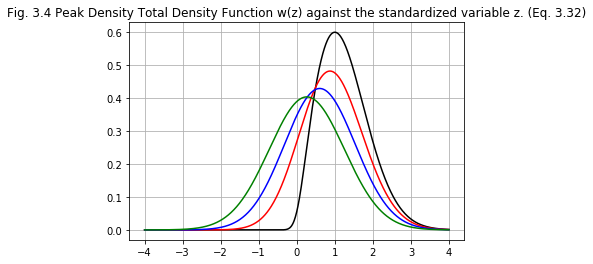

In [6]:
plt.plot(z,w1,'k-');
plt.plot(z,w2,'r-');
plt.plot(z,w3,'b-');
plt.plot(z,w4,'g-');
plt.grid(); plt.title('Fig. 3.4 Peak Density Total Density Function w(z) against the standardized variable z. (Eq. 3.32)');

rainflow count 알고리즘의 복잡성 때문에 PSD $G(w)$에서 rainflow 분포를 유도하는 것은 매우 어려운 일일 것이다. 하지만, 몬테카를로 접근법을 사용하면 FFT 방법을 사용해 $G(w)$로부터 샘플 응력 시간이력 $s(t)$를 생성할 수 있다. 그려면, rainflow 알고리즘을 $s(t)$에 적용해 사이클 수와 rainflow로 센 범위들에 대한 확률밀도 함수를 결정할 수 있다. 이를 사용하면 상수 $K$와 $b$를 갖는 주어진 재료에 대하여 Eq. 3.27을 사용해 피로손상을 계산할 수 있다. 이와 유사한 접근법은 Wirsching 외[10,11]가 사용했으며, 주어진 PSD $G(w)$로 랜덤 샘플 응력 시간이력 $s(t)$를 생성하고, rainflow로 추출한 범위의 확률밀도 함수를 결정하고, 이로 피로 손상을 계산하는데 적용했다. 그 논문들 중 첫째 논문[10]에는, 응력 시간이력 $s(t)$의 rainflow 범위를 Weibull 분포함수를 사용해 모델링할 수 있는 가능성에 대해 조사하였다. 하지만, 시뮬레이션 결과 $s(t)$의 밀도는 일반적으로 Weibull이 아니다. 그럼에도 불구하고, Weibull로 가정한 경우의 범위 밀도 함수로 계싼한 피로손상과 개별 rainflow 사이클의 합으로 계산한 피로 손상은 비교되었다. Weibull 분포에 대하여 irregularity factor $\gamma$와 SN 커브의 기울기인 $b$에 대한 함수인 correction factor를 제안하였다.